#### Seaborn

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [162]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터
mpg = sns.load_dataset('mpg')           #mile per gallon 데이터

- 1차원 분포

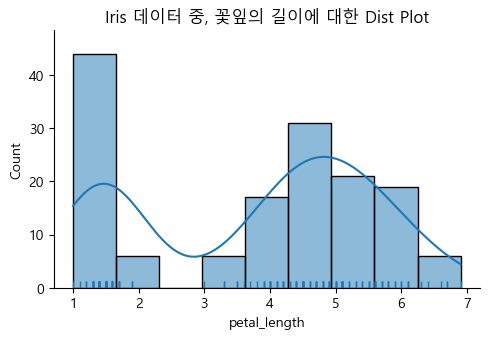

In [163]:
# distplot(distribution plot)

fig = sns.displot(x='petal_length', kde=True, rug=True, data=iris)
fig.fig.set_size_inches(5,3)
plt.title('Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')
plt.show()

- 카운트 plot

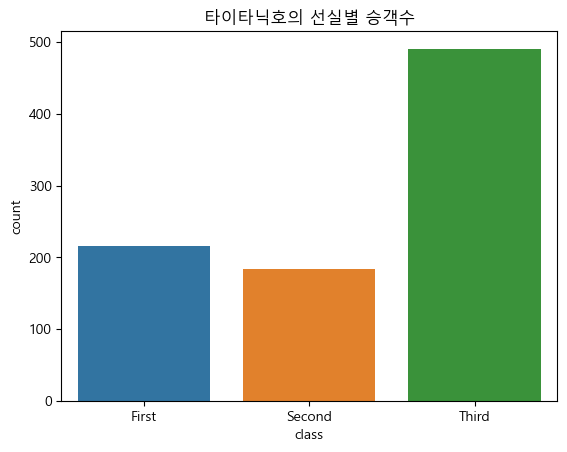

In [164]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 선실별 승객수')
plt.show()

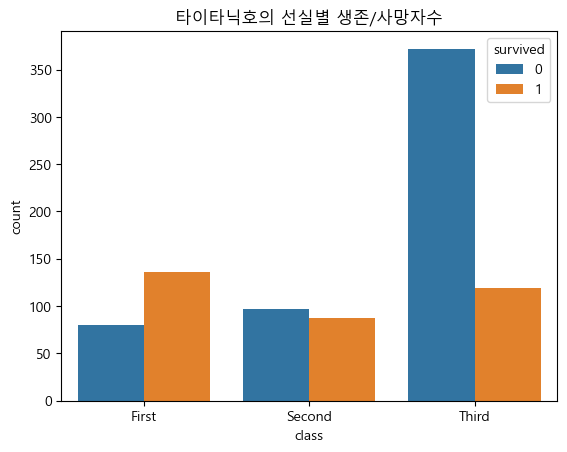

In [165]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('타이타닉호의 선실별 생존/사망자수')
plt.show()

- 다차원 실수 데이터

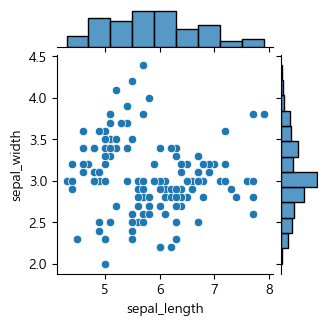

In [166]:
# joint plot
fig =sns.jointplot(x='sepal_length', y= 'sepal_width', data=iris)
fig.fig.set_size_inches(3,3)
plt.show()

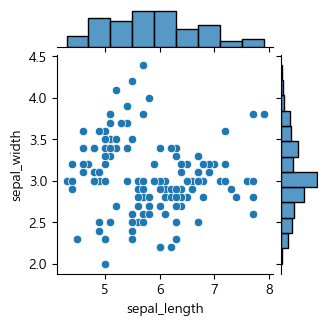

In [167]:
# joint plot
fig =sns.jointplot(x='sepal_length', y= 'sepal_width', data=iris)
fig.fig.set_size_inches(3,3)
plt.show()

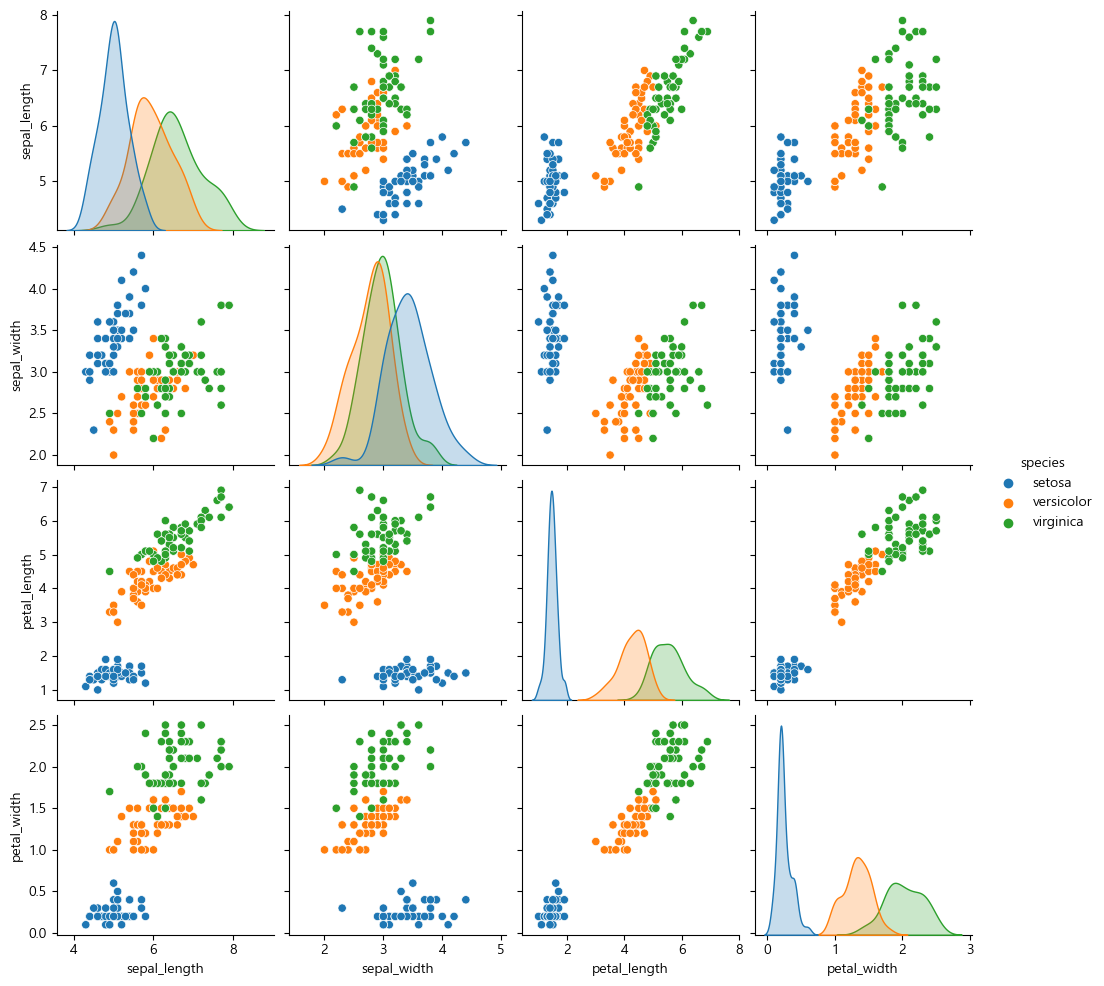

In [168]:
# pair plot
sns.pairplot(hue='species', data=iris);

- 다차원 카테고리 데이터

In [169]:
# heatmap
dt = titanic.pivot_table('survived','class','sex','count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [1]:
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt='ㄹ')
plt.title('타이타닉호의 선실별 남녀 Heatmap');

NameError: name 'sns' is not defined

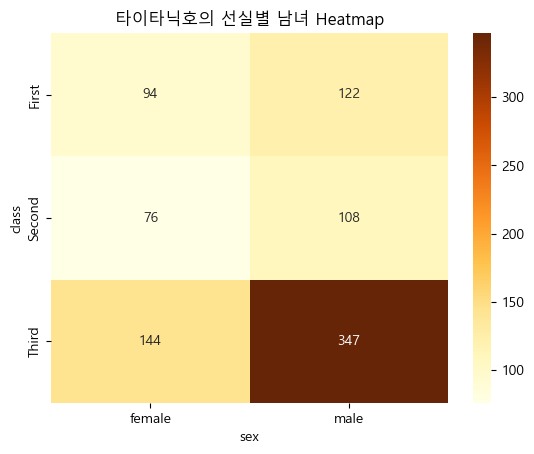

In [171]:
sns.heatmap(dt, cmap='YlOrBr', annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 Heatmap');

In [172]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


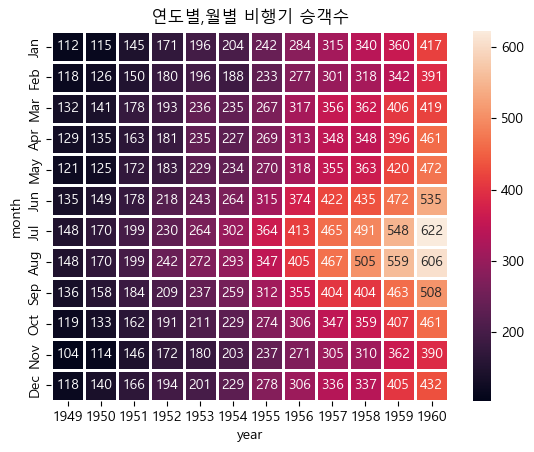

In [173]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(passengers,annot=True,fmt='d', linewidths=1)
plt.title('연도별,월별 비행기 승객수');

- 다차원 복합데이터 -barplot

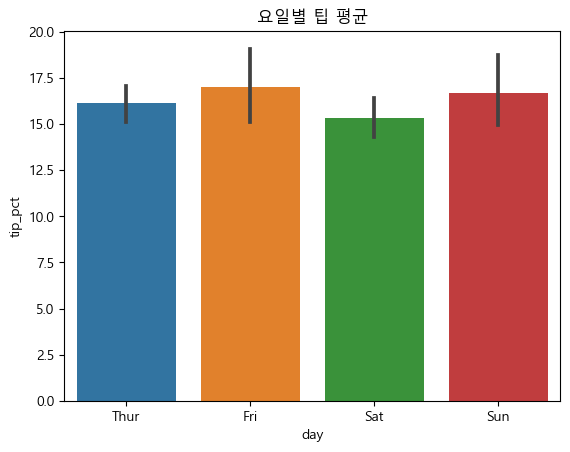

In [174]:
tips['tip_pct'] = (tips.tip / tips.total_bill*100).round(2)
sns.barplot(x='day',y='tip_pct', data=tips)
plt.title('요일별 팁 평균');

In [175]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [176]:
mpg['manufacturer'] = mpg.name.apply(lambda x : x.split()[0])
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth


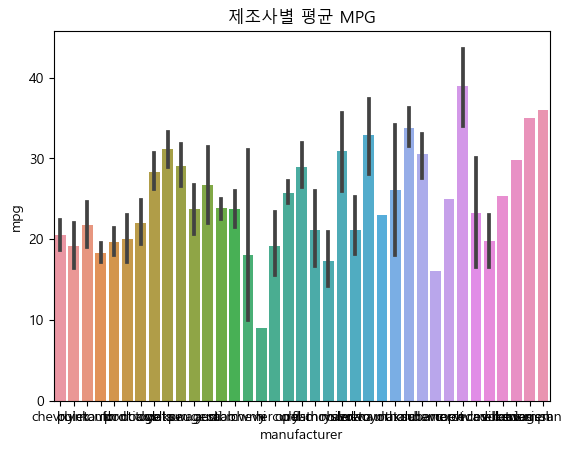

In [177]:
sns.barplot(x='manufacturer', y='mpg', data=mpg)
plt.title('제조사별 평균 MPG');

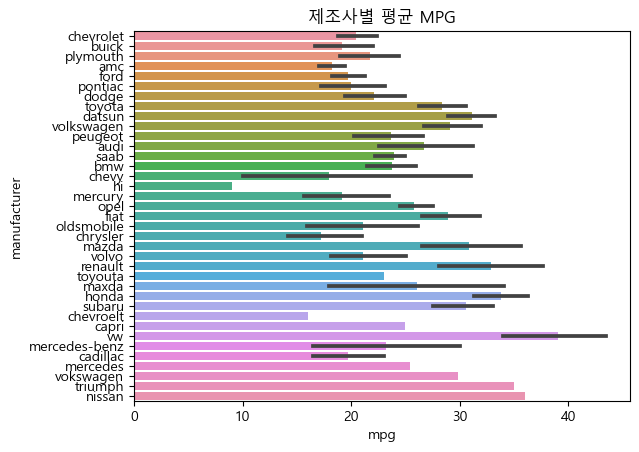

In [178]:
 # x값과 y값을 바꿔주면 barplot이 barh가 된다.
sns.barplot(x='mpg', y='manufacturer', data=mpg)   
plt.title('제조사별 평균 MPG');

- boxplot

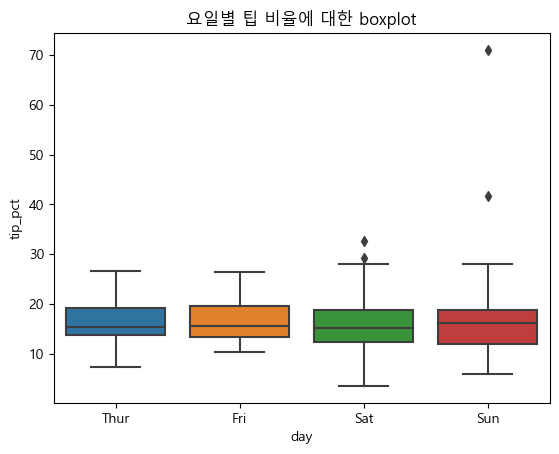

In [179]:

# 요일별 팁의 비율
sns.boxplot(x='day', y='tip_pct', data=tips)
plt.title('요일별 팁 비율에 대한 boxplot');

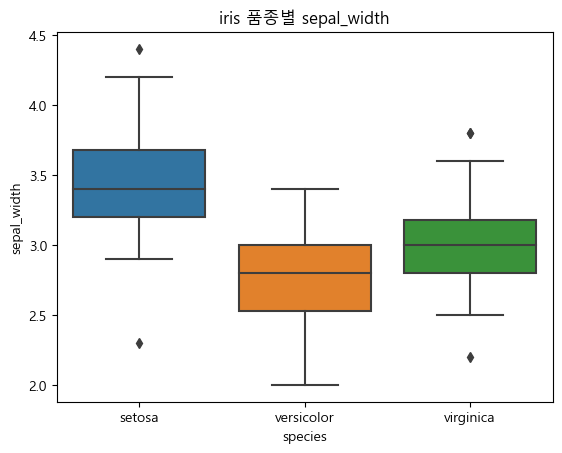

In [180]:
# iris
sns.boxplot(x='species', y= 'sepal_width',data=iris)
plt.title('iris 품종별 sepal_width');

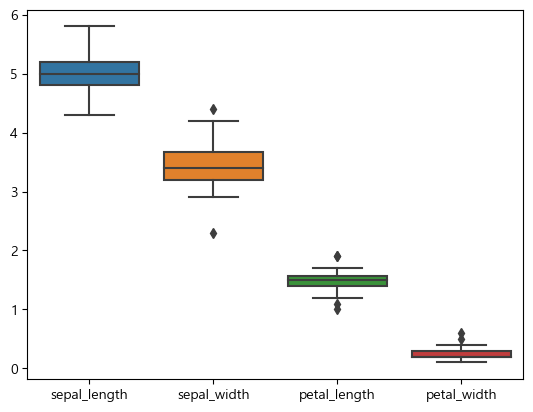

In [181]:
sns.boxplot(data=iris[iris.species == 'setosa']);

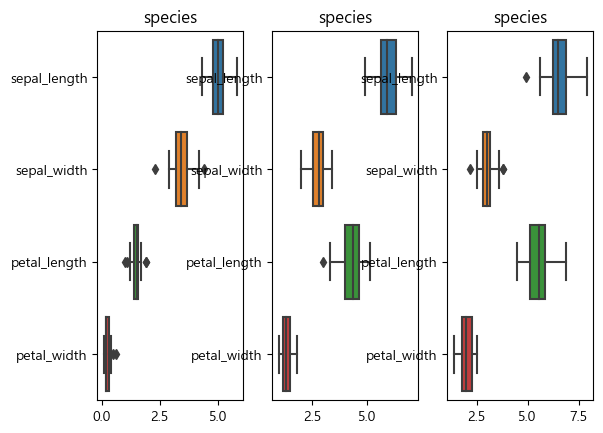

In [182]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == species], orient='horizontal')
    plt.title('species')
plt.show()


- regplot

In [183]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


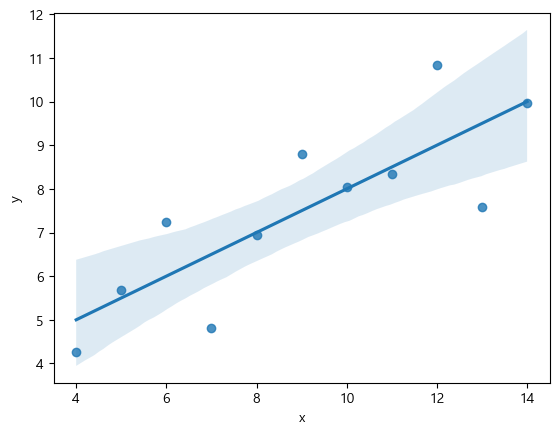

In [184]:
sns.regplot(x='x',y='y', data=ans[ans.dataset == 'I']);

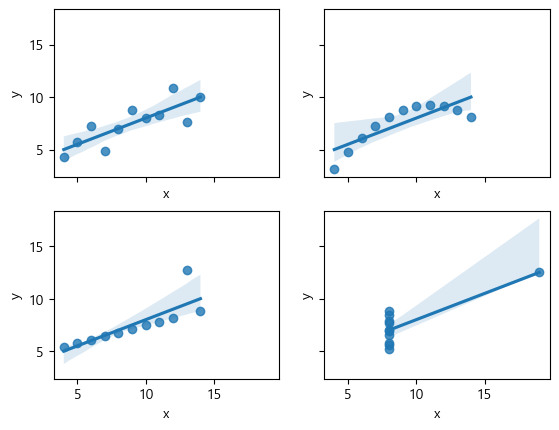

In [187]:
_, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i // 2, i % 2
    sns.regplot(x='x',y='y', data=ans[ans.dataset == roman], ax=axes[row][col])
plt.show()

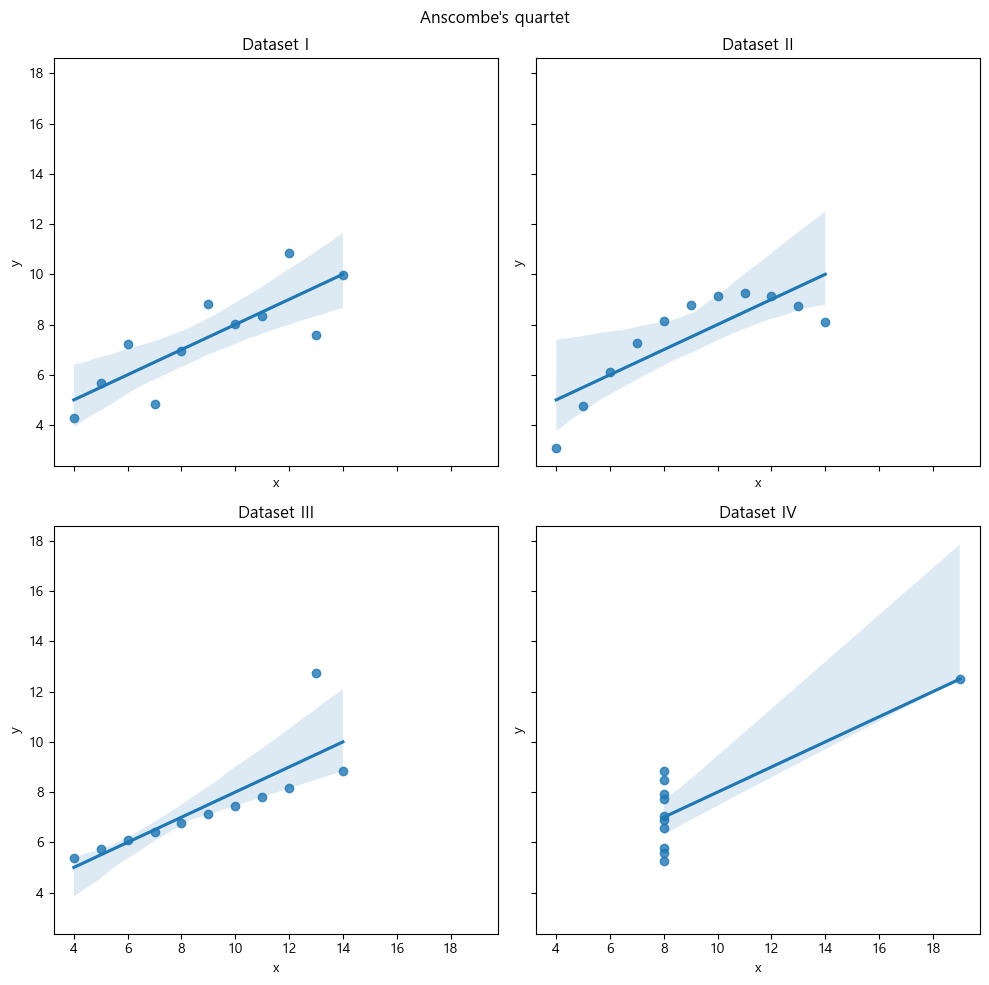

In [190]:
fig, axes = plt.subplots(2,2, figsize=(10,10),  sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i // 2, i % 2
    ax = axes[i // 2, i % 2 ]
    sns.regplot(x='x',y='y', data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's quartet")
plt.tight_layout()
plt.show()